## Network Science Project 1
### Autumn 2022
### Due: November 4th, 1:00pm GMT

Please provide the following information:

Group number:

CID #1: 

CID #2:

CID #3:

In [2]:
# Do not modify this cell or import any other modules
# without explicit permission. 
# You should run this cell before running the code below.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#You may also use scipy as needed

### Overview

When working on real-world problems, we often encounter *weighted* networks. In this assignment, you will work through a set of tasks using data for a weighted directed network where the nodes correspond to regions of the human brain with particular functions, and weighted links indicate the density of neuron fiber pathways between regions. You have been provided a file containing the network data which should be stored in the same folder as this notebook. Run the cell below to verify that you can load the graph.

In [3]:
import networkx as nx
g = nx.read_graphml('project1.graphml')
g = nx.convert_node_labels_to_integers(g)
print(type(g))
print("N =",g.number_of_nodes())
print("L =",g.number_of_edges())

<class 'networkx.classes.digraph.DiGraph'>
N = 872
L = 4036


The output from the cell above should indicate that g is a DiGraph with 872 nodes and 4036 links. 

Note that the label assigned to the edge weights in g is 'eweight'.

### Part 1: degree distributions (7 points)

For directed graphs, a node has two types of degrees, an in-degree ($k^{in}$) and an out-degree ($k^{out}$). For weighted graphs we have weighted versions of these degrees which can be computed as follows. Let $\rm W$ be the *weight matrix* for a directed network where $W_{ij}$ is the weight for the link pointing from node $j$ to node $i$. If no such link exists, then $W_{ij}=0$. The weighted in- and out-degrees for node $i$ can be computed using: 
$$\tilde k_i^{in} = \sum_{j=1}^N W_{ij}, $$
$$\tilde k_i^{out} = \sum_{j=1}^N W_{ji}. $$


1. Add code to the cell below to create a well-designed figure which shows the unweighted in- and out-degree distributions for the provided graph. Both distributions should be displayed on the same plot. Below the figure, provide a 1-paragraph explanation which: 1) describes one or more important differences between the two distributions and 2) explains what the difference(s) tells you about the graph structure. You should not focus on individual degree values but instead explain trends associated with a range (or ranges) of degrees. You should use your judgement to decide what is "important".

Note: *nx.degree_histogram* is unlikely to be helpful here, however the *np.unique* function with the *return_counts* option may be useful.

Text(0.5, 1.0, 'Degree distribution of k_in and k_out')

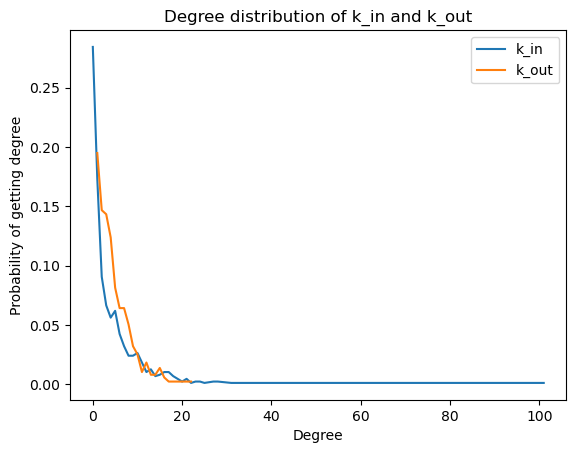

In [4]:
W = nx.to_numpy_array(g)

k_in = [g.in_degree(n) for n in g]  #in degree for each node
k_out = [g.out_degree(n) for n in g]  #out degree for each node

degree_k_in, count_k_in = np.unique(k_in, return_counts=True) #array of degrees and count of each degree
degree_k_out, count_k_out = np.unique(k_out, return_counts=True) #array of degrees and count of each degree

prob_of_degree_k_in = count_k_in / g.number_of_nodes() #probability of getting each value for degree in
prob_of_degree_k_out = count_k_out / g.number_of_nodes() #probability of getting each value for degree out

fig, ax = plt.subplots() #creating axes for plot

k_in = ax.plot(degree_k_in,prob_of_degree_k_in, label='k_in') #k_in
k_out = ax.plot(degree_k_out,prob_of_degree_k_out, label='k_out') #k_out

ax.legend() 
plt.xlabel("Degree") 
plt.ylabel("Probability of getting degree") 
plt.title("Degree distribution of k_in and k_out") 

In [5]:
print(max(degree_k_in), max(degree_k_out))

101 22


For low degrees the probability of $k^{in}$ is higher than $k^{out}$ but as the degree value increases the probabilities for both $k^{in}$ and $k^{out}$ decrease while both moving closer to each other. The maximum value of $k^{in}$ is 101 and the maximum value of $k^{out}$ is 22. 

This tells us 


NEEDS TO BE FINISHED

2. Now develop code to create a well-designed figure which shows the **weighted** in- and out-degree distributions. Carefully examine the figure and revisit your discussion from the previous question. Explain if/to what degree your conclusions for the unweighted degree distributions apply to the weighted distributions.

Text(0.5, 1.0, 'Degree distribution of k_in_weighted and k_out_weighted')

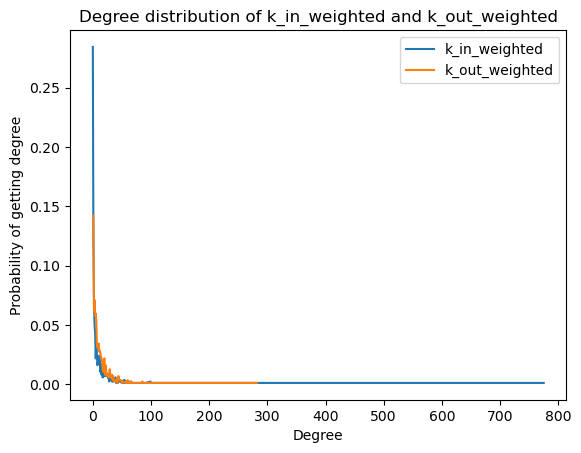

In [6]:
k_in_weighted = [g.in_degree(n, weight = "eweight") for n in g] #in weighted degree for each node
k_out_weighted = [g.out_degree(n, weight = "eweight") for n in g] #out weighted degree for each node

degree_k_in_weighted, count_k_in_weighted = np.unique(k_in_weighted, return_counts=True) #array of weighted degrees and count of each degree
degree_k_out_weighted ,count_k_out_weighted = np.unique(k_out_weighted, return_counts=True) #array of weighted degrees and count of each degree

prob_of_degree_k_in_weighted = count_k_in_weighted / g.number_of_nodes() #probability of getting each value for degree in
prob_of_degree_k_out_weighted = count_k_out_weighted / g.number_of_nodes() #probability of getting each value for degree out

fig, ax = plt.subplots() #creating axes for plot

plt.plot(degree_k_in_weighted,prob_of_degree_k_in_weighted, label = 'k_in_weighted') #k_in_weighted
plt.plot(degree_k_out_weighted,prob_of_degree_k_out_weighted, label = 'k_out_weighted') #k_out_weighted

ax.legend()
plt.xlabel("Degree")
plt.ylabel("Probability of getting degree")
plt.title("Degree distribution of k_in_weighted and k_out_weighted")

*Add explanation here*



### Part 2: centrality (9 points)

You will now develop your own code to compute the PageRank centrality. Recall that the PageRank centrality of node $i$ is typically given by: $$x_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{A_{ij}}{max(k_j^{out},1)}x_j + \frac{m}{N}x_j\right],$$ where $\rm A$ is the adjacency matrix for a graph, $N$ is the number of nodes, and we will use $m=0.15$ throughout this assigment. 

1. Complete the function below to *efficiently* compute the PageRank centrality for the provided graph using the power method. Code for the initial guess for the centrality vector, $\textrm{y}^{(0)}$ has been provided. Let $\textrm{y}^{(i)}$ be the vector produced by the $i^{th}$ iteration of the power method with $i>0$. This vector should be normalized so that its maximum value is 1. There is no need to use any other normalization (e.g. based on the vector's magnitude). Let $d_j^{(i)}=|y_j^{(i)}-y_j^{(i-1)}|, j \in \left\{1,2,...,N\right\}$. The power method iterations should terminate when $max\left\{ d_1^{(i)}, d_2^{(i)}, ..., d_N^{(i)}\right\}<tol$ where *tol* is an input variable for the function.

You should think carefully about how to avoid unnecessary calculations and unnecessary loops. You may use numpy and scipy as needed. If using scipy, add the appropriate import statements to the cell below within the function. **Do not use or import any other modules for this question**. Your code should not use any variables created outside of the function other than those provided as input (A and tol). Below the function, provide a 2-3 sentence explanation of the main steps you have taken to make your code efficient.

In [7]:
def pageRank(A,tol = 1e-8):
    """
    Compute PageRank centrality for N-node graph with adjacency matrix A

    Input:
    A: The adjacency matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector

    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m = 0.15
    N = A.shape[0] #number of nodes
    
    y0 = np.random.rand(N) #initial trial vector
    
    A = A.toarray() #convert A to array
    
    kj_out = np.sum(A, axis = 0) #vector of kj out
    
    #for loop to get make sure all elements of kjout >= 1
    
    for r in range(N):
        if kj_out[r] < 1:
            kj_out[r] = 1
            
    kj_out = np.transpose(kj_out)
    
    G = (1-m) * A / kj_out + m / N #creating G
    
    y0 = y0 / max(y0) #normalising y0
    y1 = np.dot(G, y0) #creating next iteration
    y1 = y1 / max(y1) #normalising y1
    
    #while loop to iterate until difference between successive iterations is less than tol
    
    while np.linalg.norm(y1 - y0) > tol:
        y0 = y1
        y1 = np.dot(G, y1)
        y1 = y1 / max(y1)
    
    y = y1

    return y

In [8]:
#Code for calling pageRank function
A = nx.adjacency_matrix(g).T
x = pageRank(A,tol=1e-12)

C:\Users\maxfr\AppData\Local\Temp\ipykernel_28212\2634158979.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(g).T


*Add brief discussion here*



2. PageRank can be naturally modified for weighted graphs to:
$$\tilde{x}_i = \sum_{j=1}^N\left[\left(1-m\right)\frac{W_{ij}}{max(\tilde{k}_j^{out},1)}\tilde{x}_j + \frac{m}{N}\tilde{x}_j\right],$$

Complete the function below to efficiently compute this modified PageRank centrality for the nodes in the provided graph using the power method. The same guidance and restrictions from the previous question apply here as well. It is completely fine to reuse code from your pageRank function above as needed. 

In [18]:
def pageRankW(W,tol=1e-8):
    """
    Compute Weighted PageRank centrality for N-node graph with weight matrix W

    Input:
    W: The weight matrix of the graph generated in the cell below
    tol: tolerance used to terminate iterations of power method
    
    Output:
    y: N-element numpy array containing the centrality vector
    
    Please do not modify the function input or the return statement below
    """
    import scipy.sparse as sp
    m = 0.15
    N = W.shape[0] #number of nodes
    
    y0 = np.random.rand(N) #initial trial vector
    
    W = W.toarray() #convert W to array
    
    kj_out = np.sum(W, axis = 0) #vector of kj out
    
    #for loop to get make sure all elements of kjout >= 1
    
    for r in range(N):
        if kj_out[r] < 1:
            kj_out[r] = 1
            
    kj_out = np.transpose(kj_out)
    
    G = (1-m) * W / kj_out + m / N #creating G
    
    y0 = y0 / max(y0) #normalising y0
    y1 = np.dot(G, y0) #creating next iteration
    y1 = y1 / max(y1) #normalising y1
    
    #while loop to iterate until difference between successive iterations is less than tol
    
    while np.linalg.norm(y1 - y0) > tol:
        y0 = y1
        y1 = np.dot(G, y1)
        y1 = y1 / max(y1)
    
    y = y1

    return y

In [19]:
#Code for calling pageRank function
W = nx.adjacency_matrix(g,weight='eweight').T
x_tilde = pageRankW(W,tol=1e-12)

C:\Users\maxfr\AppData\Local\Temp\ipykernel_28212\3152834066.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  W = nx.adjacency_matrix(g,weight='eweight').T


*No discussion of pageRankW function is needed*

3. Examine your results for the centralities, and compare the ten most important nodes as ranked by (1) the unweighted in-degree centrality, (2) the unweighted PageRank centrality, and (3) the weighted PageRank centrality. Add code to the cell below to support your comparison. Provide a brief non-technical description of how much agreement there is between (1) and (2) and between (2) and 3). Your code may generate 1-2 figures, simply print out lists of the most important nodes, or do something else that is comparably useful.

In [20]:
lis = [0, 1] #used to create y = x line
unweighted_in_deg = A.sum(axis = 1) / np.max(A.sum(axis = 1)) #calculating (1)

unweighted_in_deg_copy = list(unweighted_in_deg) #creating list of (1)
x_copy = list(x) #creating list of (2)
x_tilde_copy = list(x_tilde) #creating list of (3)

unweighted_top_10 = [] 
x_top_10 = []
x_tilde_top_10 = []

#for loop to get top 10 centralities for (1), (2) and (3)

for i in range(10):
    unweighted_top_10.append(np.max(unweighted_in_deg_copy))
    unweighted_in_deg_copy.remove(np.max(unweighted_in_deg_copy))
    
    x_top_10.append(np.max(x_copy))
    x_copy.remove(np.max(x_copy))
    
    x_tilde_top_10.append(np.max(x_tilde_copy))
    x_tilde_copy.remove(np.max(x_tilde_copy))

Text(0.5, 1.0, 'Unweighted Degree Centrality Against Unweighted PageRank Centrality')

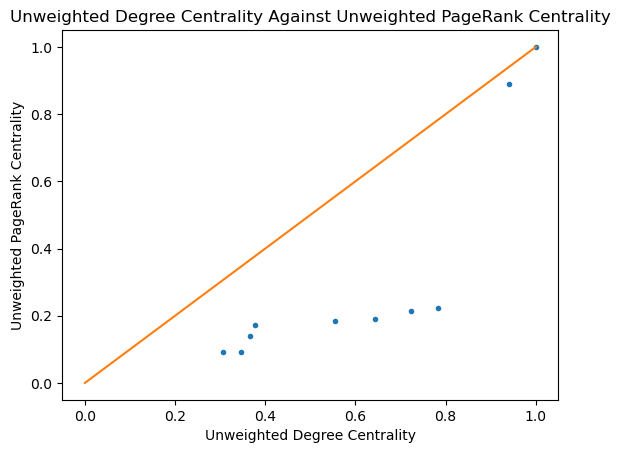

In [21]:
fig, ax = plt.subplots() #creating axes for plot

plt.plot(unweighted_top_10, x_top_10, '.') #(1) against (2) 
plt.plot(lis, lis) #plot of x = y

plt.xlabel("Unweighted Degree Centrality")
plt.ylabel("Unweighted PageRank Centrality")
plt.title("Unweighted Degree Centrality Against Unweighted PageRank Centrality")

Text(0.5, 1.0, 'Unweighted PageRank Centrality Against Weighted PageRank Centrality')

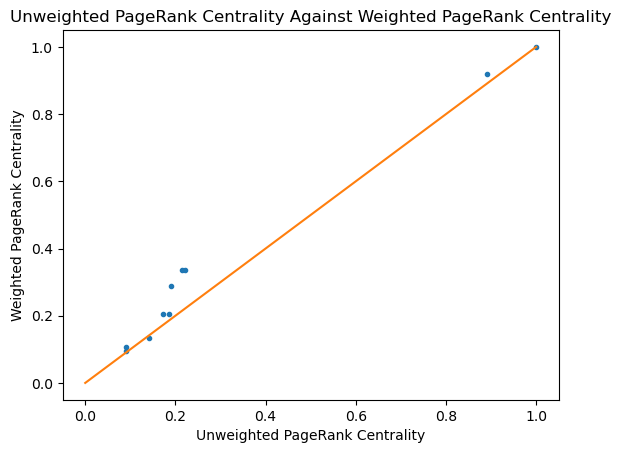

In [22]:
fig, ax = plt.subplots() #creating axes for plot

plt.plot(x_top_10, x_tilde_top_10, '.') #(2) against (3) 
plt.plot(lis, lis) #plot of x = y

plt.xlabel("Unweighted PageRank Centrality")
plt.ylabel("Weighted PageRank Centrality")
plt.title("Unweighted PageRank Centrality Against Weighted PageRank Centrality")

### Part 3: Visualizing a random person's brain network (4 points)

Create a well-designed figure displaying the 100 most important nodes in the brain network and the links connecting these nodes with each other. You may use the centrality of your choice to decide which nodes are the most important. The node sizes in your figure should be set so that larger sizes correspond to more important nodes. You do not need to include node labels, edge weights, or use the edge weights to modify the displayed links.


C:\Users\maxfr\AppData\Local\Temp\ipykernel_28212\2218258397.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  Wgraph = nx.adjacency_matrix(graph,weight='eweight').T


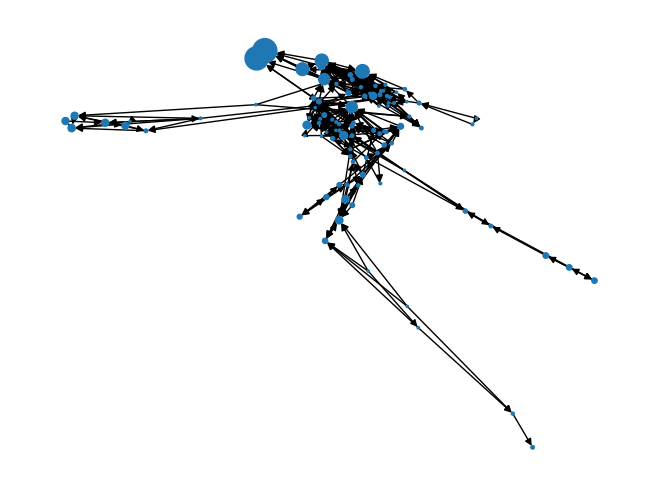

In [30]:
top100index = np.argsort(x_tilde)[-100:] #index list of top 100 for weighted PageRank centrality

graph = g.subgraph(top100index) #create subgraph with only nodes specified by index list

Wgraph = nx.adjacency_matrix(graph,weight='eweight').T #adjacency matrix of subgraph
x_tilde_graph = pageRankW(Wgraph,tol=1e-12) #weighted PageRank centrality of subgraph

nx.draw(graph, node_size = 300 * x_tilde_graph) #draw graph

**Note:** If you are curious about the neuroscience aspect of this assignment, you can extract information about each graph node as in the cell below. However, note that the original graph has been "adjusted" a little to make it suitable for this assignment. This is just "extra" information and is not needed to complete the assignment.

In [16]:
print(g.nodes[0])

{'dn_correspondence_id': '1', 'dn_hemisphere': 'right', 'dn_name': 'rh.lateralorbitofrontal_9', 'dn_fsname': 'lateralorbitofrontal_9', 'dn_region': 'cortical', 'dn_position_z': 29.7843137255, 'dn_position_y': 72.6764705882, 'dn_position_x': 37.637254902, 'id': '1'}


### Further guidance

* Your group should submit both a completed Jupyter notebook and *either* a pdf version or html version of the notebook (generated using File --- Download as). If you cannot generate a pdf, try installing latex first, or submit an html version instead. Each group should make a single submission.
    To submit your assignment, go to the Project 1 item on the module Blackboard page. There will be an option to attach your completed Jupyter notebook and pdf/html file to your submission. (these should be named *project1_groupx.ipynb* and *project1_groupx.pdf* or *project1_groupx.html* where x is your group number). 
* You may use numpy, scipy, and matplotlib as needed. You may use networkx as needed **except** for part 2, questions 1 and 2. Please do not use any other packages without explicit permission.
* Marking will be based on the correctness of your work, the efficiency of your codes for part 2, questions 1 and 2, and the degree to which your submission reflects a good understanding of the material covered up to the release of this assignment. 
* This assignment requires sensible time-management on your part. Do not spend so much time on this assignment that it interferes substantially with your other modules. If you are concerned that your approach to the assignment may require an excessive amount of time, please get in touch with the instructor. 
* Questions about the assignment should be asked in private settings. This can be a "private" question on Ed (which is distinct from "anonymous"), asking for a one-on-one meeting during office hours, or during a problem class.
* Please regularly backup your work. For example, you could keep an updated copy of your notebook on OneDrive.
* In order to assign partial credit, we need to understand what your code is doing, so please add comments to the code to help us.
* It may be helpful to initally develop your code in a Python module (outside of a function) and run it in a qtconsole (or similar Python terminal) so that you can readily access the values of the variables you are using.
* Feel free to use/modify codes that I have provided during the term.
